In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics
from ipywidgets import interact
import matplotlib as mpl
import pandas as pd

In [2]:
X, _ = datasets.make_blobs(n_samples=6, cluster_std=1, random_state=9)

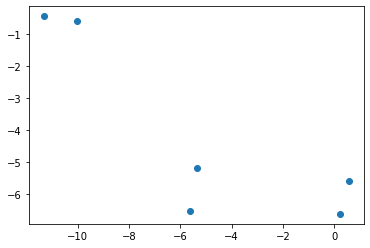

In [3]:
plt.scatter(*X.T)

In [4]:
model = cluster.AgglomerativeClustering(n_clusters=6)
clusters = model.fit_predict(X)
df = pd.DataFrame(X).assign(c=clusters)
df['c'] = df['c'].map(df.groupby('c')[1].min().rank().astype(int).to_dict())

In [5]:
pd.DataFrame(np.triu(metrics.euclidean_distances(df[[0, 1]]))).replace(0, np.nan).style.highlight_min(color='red')

,0,1,2,3,4,5
0,nan,1.086901,5.827837,5.725446,13.066488,11.875712
1,nan,nan,6.238586,5.898912,12.923010,11.694524
2,nan,nan,nan,1.360630,8.327698,7.386182
3,nan,nan,nan,nan,7.629628,6.566544
4,nan,nan,nan,nan,nan,1.286277
5,nan,nan,nan,nan,nan,nan


In [6]:
@interact(k=(1,6,1))
def vizagg(k=6):
    global df
    model = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
    plt.figure(figsize=(12, 8))
    clusters = model.fit_predict(X)
    df = pd.DataFrame(X).assign(c=clusters)
    df['c'] = df['c'].map(df.groupby('c')[1].min().rank().astype(int).to_dict())
    clusters = df['c'].values
    plt.scatter(*X.T, c=clusters, cmap=mpl.cm.get_cmap('rainbow', 6), s=300)
    for (x, y), c in zip(X, clusters):
        plt.text(x+.2, y+.2, str(c))
    plt.grid()

interactive(children=(IntSlider(value=6, description='k', max=6, min=1), Output()), _dom_classes=('widget-inte…

## Dendrograms

In [7]:
import scipy.cluster.hierarchy as sch

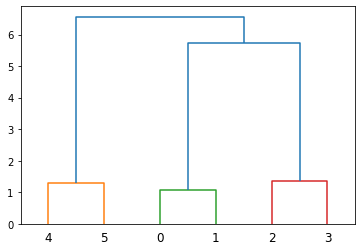

In [8]:
sch.dendrogram(sch.linkage(X, method='single'));

In [9]:
X, _ = datasets.make_moons(n_samples=150, noise=0.1, random_state=1)

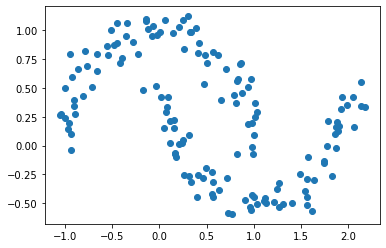

In [10]:
plt.scatter(*X.T)

## Different Linkage Types

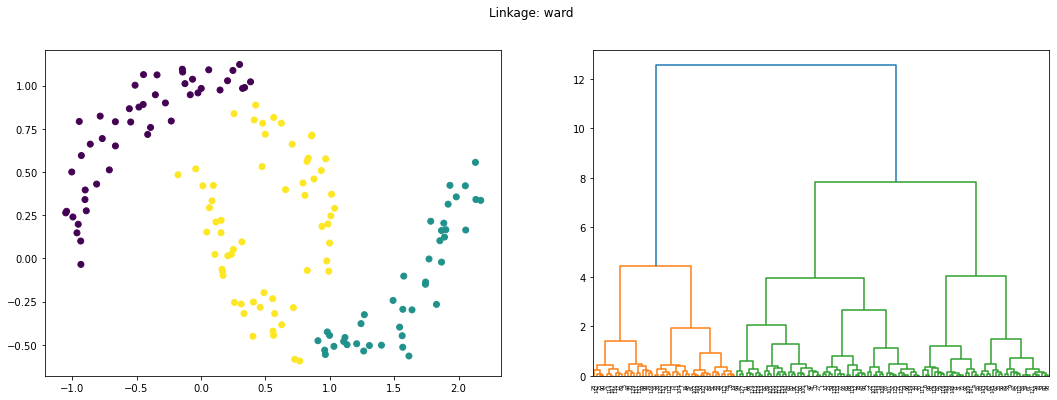

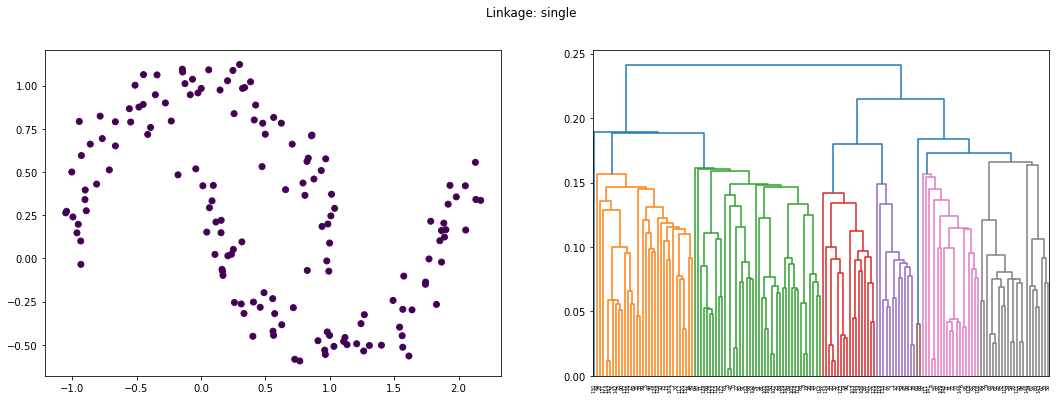

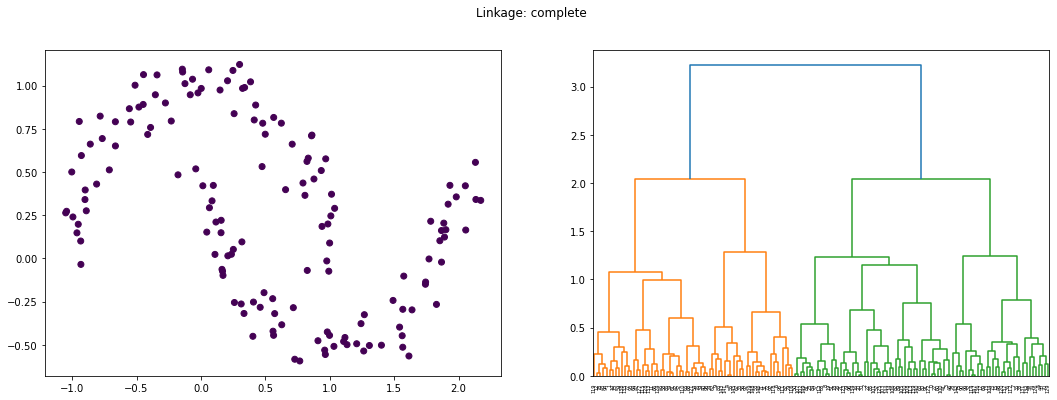

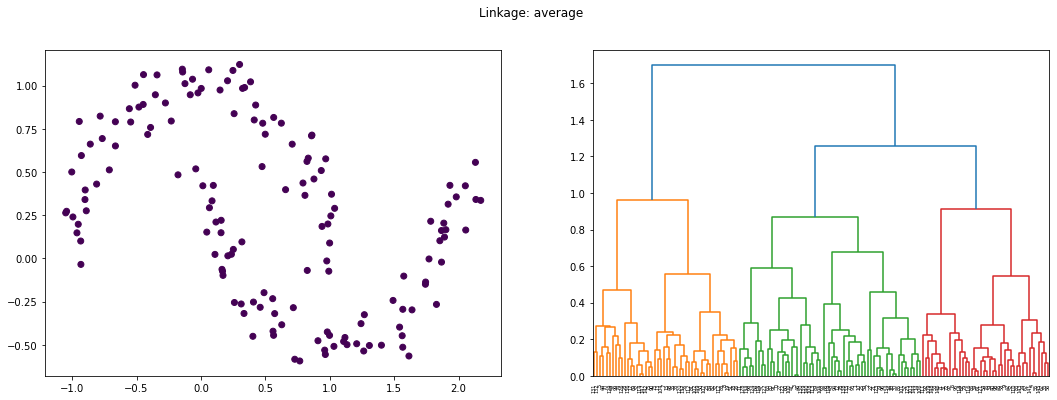

In [11]:
for LINKAGE in ['ward', 'single', 'complete', 'average']:
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(*X.T, c=cluster.AgglomerativeClustering(distance_threshold=6, n_clusters=None, linkage=LINKAGE, ).fit_predict(X))
    plt.subplot(1, 2, 2)
    sch.dendrogram(sch.linkage(X, method=LINKAGE))
    plt.suptitle(f"Linkage: {LINKAGE}")

In [12]:
X, _ = datasets.make_moons(n_samples=150, noise=0.01, random_state=1)

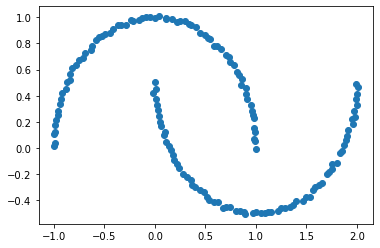

In [13]:
plt.scatter(*X.T)

### Moons with less noise

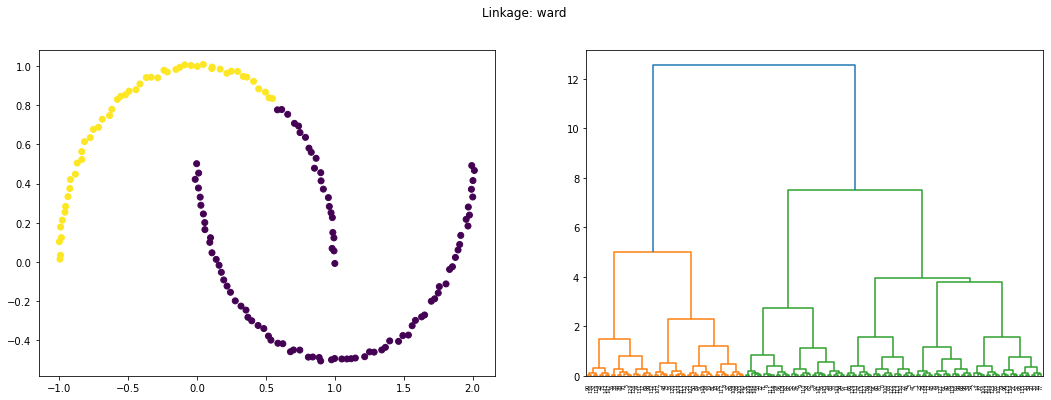

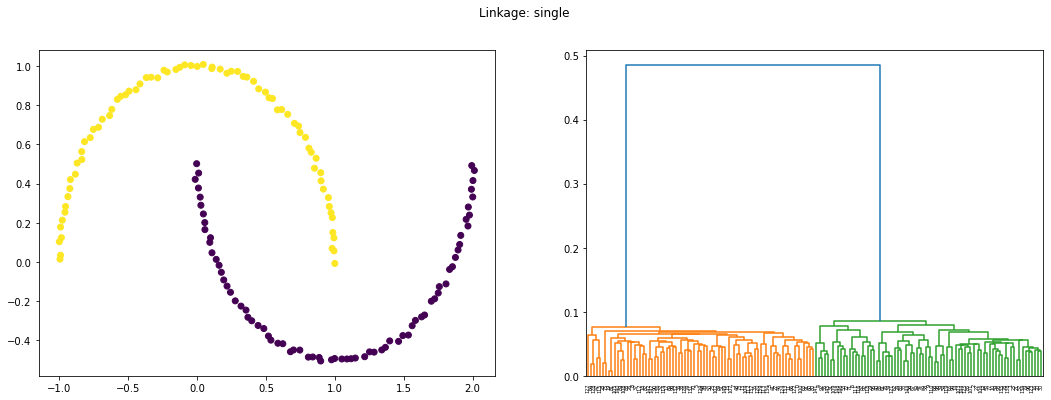

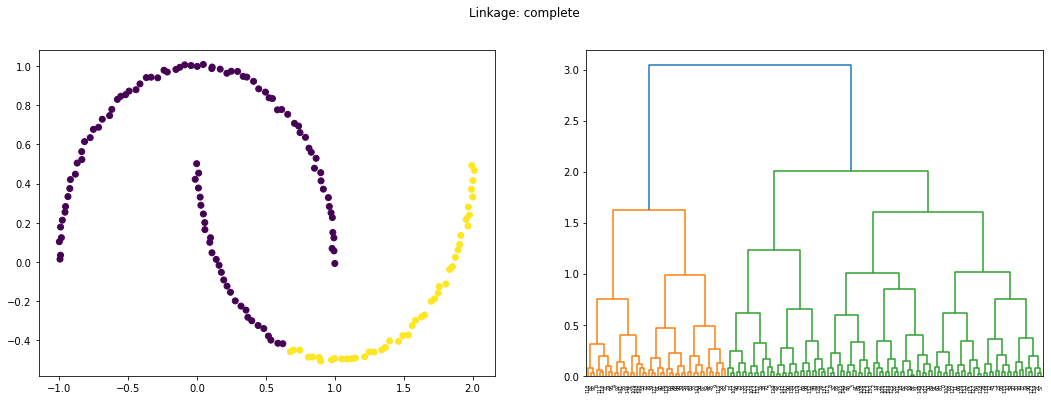

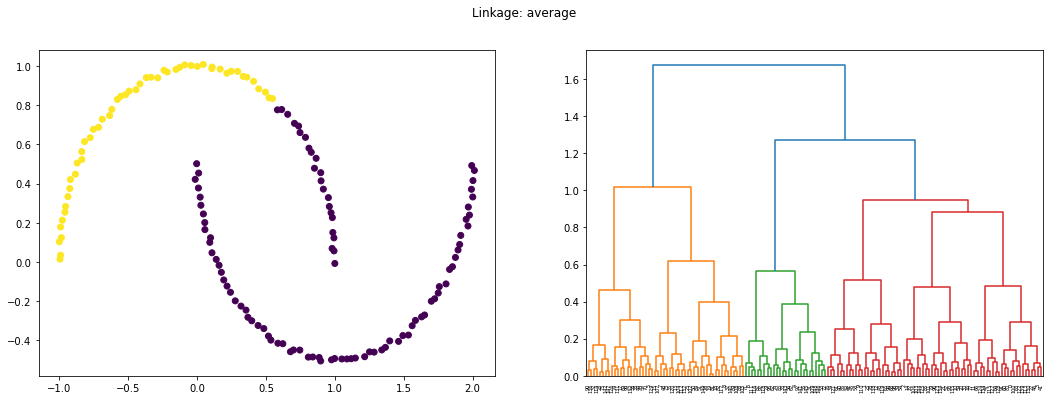

In [14]:
for LINKAGE in ['ward', 'single', 'complete', 'average']:
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(*X.T, c=cluster.AgglomerativeClustering(n_clusters=2, linkage=LINKAGE).fit_predict(X))
    plt.subplot(1, 2, 2)
    sch.dendrogram(sch.linkage(X, method=LINKAGE))
    plt.suptitle(f"Linkage: {LINKAGE}")

In [15]:
model.predict([[2, 2]])

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'